In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

# Математика

## 1. Предел и непрерывность функции

**Опр.** Число $a$ будем называть пределом последовательности $x_{i}$  если: 
\begin{equation*}
    \forall \varepsilon > 0  \, \exists  \, N : \, \forall n > N \, |x_{x} - a| \leq \varepsilon
\end{equation*}


**Опр.** Функцию $f(x)$ будем называть непрерывной в точке $x_{0}$, если предел $f(x)$ существует в этой точке и равен $f(x_{0})$:
\begin{equation*}
    \lim_{x\to x_{0}}f(x) = f(\lim_{x\to x_{0}})=f(x_{0})
\end{equation*}

P.S. Определение выше легко понять: РЕАЛЬНОЕ значение функции в точке $x_{0}$ должно совпадать с ОЖИДАЕМЫМ значением функции при приближении к этой точке. 

**Опр.** Функцию $f(x)$ будем называть непрерывной, если она определена в любой точке из области определения функции $D(f)$.



# 2. Производная функции

**Опр.** Пределом функции $f(x)$ в точке $a$ называется предел приращения функции к приращению аргумента при стремлении приращения аргумента к 0:

\begin{equation*}
    f'(x) = \lim_{ \Delta x\to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
\end{equation*}

Геометрический смысл производной --- тангенс угла наклона касательной к функции $f(x)$ в заданной точке, то есть уравнение касательной в функции $f(x)$ в точке $a$: $y = f'(a)(x - a) + f(a)$

**Опр.** Гладкие функции --- функции с непрерывной производной.

Это значит что производная резко не меняет свой знак, и у функции нет изломов.

**Теор.** Необходимое условие экстремума функции $f(x)$ в точке $a$: производная функции равна нулю в этой точке, те $f'(a) = 0$.

**Теор.** Достаточное условие экстремума функции $f(x)$ в точке $a$: если выполнено необходимое условие экстремума функции в этой точке (а именно --- первая производная равнв 0, те. $f'(a) = 0$) и выполнено:
1. $f''(x) < 0 $ --- функция вогнутая и в точке $a$ достигается максимум
2. $f''(x) > 0 $ --- функция выпуклая и в точке $a$ достигается минимум



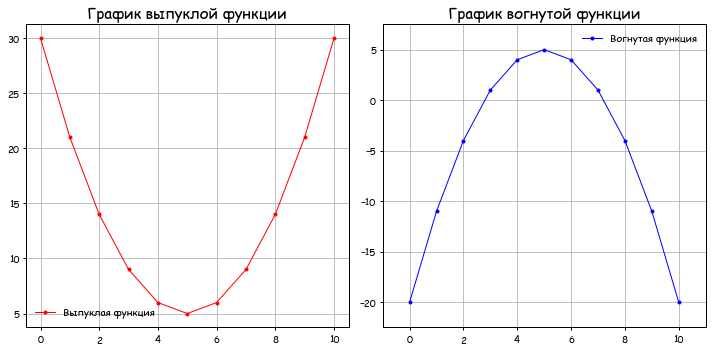

In [2]:
%run ./plot.py func

## 3. Вектора и матрицы

Далее нам очень много придется работать с векторами, поэтому разберем основные определения, необходимые для дальнейшей работы.

### 3.1 Метрические пространства

Основной вопрос: как определить расстояние между векторами?


Для этого в математическом анализе принято вводить понятие **метрики**, а пространства для которых метрика определена принято называть **метрическими пространствами**.

**Опр.**. Метрикой называют опрацию, которая в соответствии паре векторов $x$ и $y$ ставит число $\rho(x, y)$, такое что:
1. $\rho(x, y) \geq 0\; \rho(x,y) = 0 \Leftrightarrow x = y$ (*Разделение точек*)
2. $\rho(x,y) = \rho(y,x)$ (*Симметричность*)
3. Для любых трех векторов $x, y, z$ справедливо: $\rho(x, y) \leq \rho(x, z) + \rho(y, z)$ (*Неравенство треугольника*)

Примеры метрических пространcтв:

Рассмотрим два вектора $x \in \mathbb{R}^{n}$, $y \in \mathbb{R}^{n}$:

In [3]:
x = np.random.rand(3)
print('Вектор x = {0}'.format(x))

y = np.random.rand(3)
print('Вектор y = {0}'.format(y))

Вектор x = [0.16983996 0.46321809 0.14283842]
Вектор y = [0.51140649 0.62450812 0.87730904]


Для двух векторов $x$ и $y$ расстояние $\ell_{1}$ между ними вычисляется как:

$$
 \rho_{1}\left( x, y \right) = \left\Vert x - y \right\Vert_{1} = \sum_{i=1}^n \left| x_{i} - y_{i} \right|
$$

Вычислим эти расстояния двумя способами:
1. При помощи `numpy.linalg` 
2. При помощи `scipy.spatial.distance.cdist`. Тут стоит отметить что число размерностей вектора должно быть 
равно $2$ минимум, поэтому при работе с $1D$ векторами необходимо использовать `np.newaxis`. Подробнее 
[тут](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.spatial.distance.cdist.html).

In [5]:
from scipy.spatial.distance import cdist
from numpy.linalg import norm

print('l1 расстояние между векторами (numpy): {0}'.format(
    round(norm(x - y, ord=1), 3)
))

print('l1 расстояние между векторами (scipy): {0}'.format(
    round(cdist(x[np.newaxis, :], y[np.newaxis, :], metric='minkowski', p=1)[0][0], 3)
))

l1 расстояние между векторами (numpy): 1.237
l1 расстояние между векторами (scipy): 1.237


Для тех же векторов, расстояние $\ell_{2}$ между ними вычисляется как:

$$
 \rho_{2}\left( x, y \right) = \left\Vert x - y \right\Vert_{2} = 
 \sqrt{\sum_{i=1}^n \left( x_{i} - y_{i} \right)^2}.
$$

Вычислим их аналогично с использованием `numpy` и `scipy`.

In [6]:
print('l2 расстояние между векторами (numpy): {0}'.format(
    round(norm(x - y, ord=2), 3)
))

print('l2 расстояние между векторами (scipy): {0}'.format(
    round(cdist(x[np.newaxis, :], y[np.newaxis, :], metric='minkowski', p=2)[0][0], 3)
))

l2 расстояние между векторами (numpy): 0.826
l2 расстояние между векторами (scipy): 0.826


P.S. Стоит также отметить, что именно метрика определяет понятие сходимости и предела, так как имеено она задает расстояние между элементами пространства.

### 3.2 Линейные пространства

**Опр** Линейное пространство $\mathbb{R}$ - это множество на котором определено две опреации:
1. Сумма векторов: $\forall \, x, y \in \mathbb{R}: \; x + y = z \in \mathbb{R}$
2. Умножение вектора на число: $\forall x \in \mathbb{R}, \alpha: \, \alpha x \in \mathbb{R}$

Аксиомы линейного пространства:
1. **СДЕЛАТЬ**

**Опр.** Вектора $x_{0}, x_{1}, \dots x_{n}$ называют линейно независимыми (ЛН), если выражение ниже верно только при коэффициентах $\beta_{0}, \beta_{1}, \dots \beta_{n}$ равных нулю:
\begin{equation*}
    \beta_{0}x_{0} + \dots \beta_{n}x_{n} = \sum_{i=0}^{n}\beta_{i}x_{i} = 0
\end{equation*}

В противном случае вектора $x_{0}, \dots x_{n}$ являются линейно зависмыми, и можно любой из них выразить как некотурую линейную комбинацию остальных векторов.

**Опр.** Размерностью простарнства $dim(\mathbb{R})$ называют максимальное число ЛН векторов данного пространства.

### Нормированные пространства

Оснонвной вопрос: как определить длину вектора?

Для этого в математике вводят понятие нормы вектора.

**Опр.** Нормой вектора $x$ называют число $||x||$, такое что:
1. $||x||=0$ тогда и только тогда, когда $x=0$.  (*Разделение точек*)
2. Для любых двух векторов $x$ и $y$ справдливо: $||x + y|| \leq ||x|| + ||y||$ (*Неравенство треугольника*)
3. Для любого вектора $x$ и действительного числа $\alpha$ справедливо: $||\alpha x|| = |\alpha| \times ||x||$ (*Положительная однородность*)

Норма $\rightarrow$ метрику (Достаточно ввести $\rho(x, y)=||x-y||$ но как доаказать я не понял)

**Опр.** Линейное пространство с определенной на нем нормой вектора называют *нормированным пространством*.

Примеры норм:
Основной нормой, используемой нами будет: p-норма (норма Гёльдера) для вектора $x$ вычисляется по формуле:
\begin{equation}
    \left\Vert x \right\Vert_{p} = \left( \sum_{i=1}^n \left| x_{i} \right|^{p} \right)^{1 / p},~p \geq 1,
\end{equation}
которая превращяется:
* при $p = 1$ в $\ell_{1}$ норму
* при $p = 2$ в $\ell_{2}$ норму

In [7]:
print('Вектор: {0}'.format(x))
print('l1 норма вектора: {0}'.format(round(norm(x, ord=1), 3)))
print('l2 норма вектора: {0}'.format(round(norm(x, ord=2), 3)))

Вектор: [0.16983996 0.46321809 0.14283842]
l1 норма вектора: 0.776
l2 норма вектора: 0.514


### 3.3 Пространства со скалярным произведением

Основной вопрос: как определить меру схожести двух векторов?

Для этого в математике вводят понятия скалярного произведения.

**Опр.** Скалярным произведением двух векторов $x$ и $y$ называется правило $(x, y)$ котрое ставит этой паре векторов число $z = (x, y)$ при этом:
1. $(x, x) \geq 0 \, \forall x \in \mathbb{R}$
2. $(x, y) = (y, x) \, \forall x, y \in \mathbb{R}$
3. $(\alpha x + \beta y) = \alpha(x, y) + \beta(x, y) \, \forall x, y \in \mathbb{R}$

Скалярное произведение $\rightarrow$ Норма $\rightarrow$ Метрика.

**Опр.** Скалярное произведение в пространстве $\mathbb{R}^{n}$ для двух векторов $x = (x_{1}, \dots, x_{n})$ и $y = (y_{1}, \dots, y_{n})$ определяется как:

$$
\langle x, y \rangle = \sum_{i=1}^n x_{i} y_{i}.
$$


Вычислим его для векторов $x$ и $y$ определенных ранее с помощью `numpy.dot()`

In [8]:
print('Скалярное произведение векторов: {0}'.format(round(np.dot(x, y), 3)))

Скалярное произведение векторов: 0.501


Теперь, когда мы знаем расстояние между двумя ненулевыми векторами и их длины, мы можем вычислить угол между ними через скалярное произведение:

$$
\langle x, y \rangle = \left| x \right| | y | \cos(\alpha)
\implies \cos(\alpha) = \frac{\langle x, y \rangle}{\left| x \right| | y |},
$$

где $\alpha \in [0, \pi]$ — угол между векторами $x$ и $y$.

In [9]:
cos_angle = round(np.dot(x, y) / norm(x, ord=2) / norm(y, ord=2), 3)
print('Косинус угла между x и y: {0}'.format(cos_angle))
print('Сам угол: {0}'.format(round(np.arccos(cos_angle), 3)))

Косинус угла между x и y: 0.819
Сам угол: 0.611


**Замечание**: стоит отметить, что косинусное расстояние очень хорошо применяется при *анализе текстов*, пример которого может быть найден в *Задача 1. Сравнение предложений*.